# Defining the Relaxation Parameter

First we import the necessary modules.

In [1]:
# Import module here
from utils import *

# Set computer modern as font.
import matplotlib as mpl
import matplotlib.font_manager as font_manager

mpl.rcParams['font.family']='serif'
cmfont = font_manager.FontProperties(fname=mpl.get_data_path() + '/fonts/ttf/cmr10.ttf')
mpl.rcParams['font.serif']=cmfont.get_name()
mpl.rcParams['mathtext.fontset']='cm'
mpl.rcParams['axes.unicode_minus']=False

## Import data

We import the data using the following code. These values are dictionaries.

In [2]:
cluster_data, rshifts = read_data('dat/')

C:\Users\jgoo1\Documents\Cluster-Dynamical-States\utils.py:52: RuntimeWarning: invalid value encountered in greater_equal
  np.all(entry_data >= 0, axis=1)


---Reading: DS_G3X_snap_128_center-cluster_progenitors.txt---


## Showing correlation of different parameters

The parameters to be used are $\Delta$, $f_m$, and $\eta$. First, we show the correlation between the different parameters at a test redshift of 0.0.

The correlations are found using a Pearson correlation coefficient method.

Delta vs. fm P.coeff: 0.7498615334460978
eta vs. Delta P.coeff: 0.20786839881300012
|eta-1| vs. Delta P.coeff: 0.2488767791361188
eta vs. fm P.coeff: 0.17952967831038597
|eta-1| vs. fm P.coeff: 0.21602107981455915


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


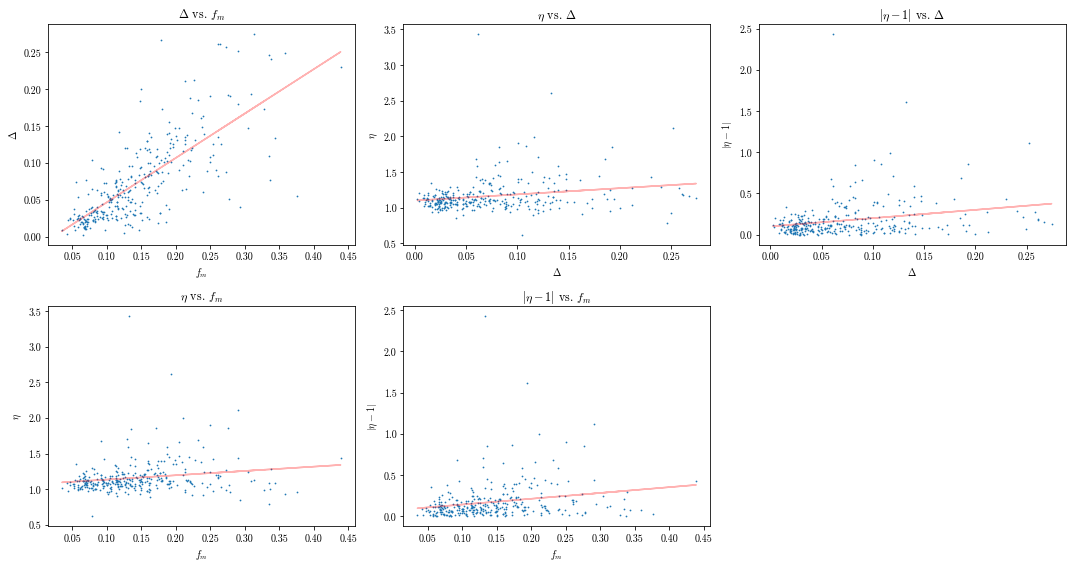

In [3]:
# Select only redshift 0.
eta, delta, fm = pull_rshift_set(cluster_data, 0)
# Define |eta - 1|
abs_eta = np.abs(eta - 1)

# Make plots. Delete extra axis.
fig, axs = plt.subplots(2,3, figsize=(15, 8))
fig.delaxes(axs[1,2])

# Distribution of delta against fm
# Find linear best fit line between data points.
ycalc, popt, pcov, pcoef = fit_data(fm, delta)
# Plot data points.
axs[0,0].plot(fm, delta, 'o', markersize=0.75)
# Plot best fit line.
axs[0,0].plot(fm, ycalc, '-', markersize=0.75, alpha=0.3, color='red')
# Axis settings.
axs[0,0].set(title='$\\Delta$ vs. $f_m$',
             xlabel='$f_m$',
             ylabel='$\\Delta$')
print('Delta vs. fm P.coeff: {}'.format(pcoef))

# Distribution of eta against delta
# Find linear best fit line between data points.
ycalc, popt, pcov, pcoef = fit_data(delta, eta)
# Plot data points.
axs[0,1].plot(delta, eta, 'o', markersize=0.75)
# Plot best fit line.
axs[0,1].plot(delta, ycalc, '-', markersize=0.75, alpha=0.3, color='red')
# Axis settings.
axs[0,1].set(title='$\eta$ vs. $\\Delta$',
             xlabel='$\\Delta$',
             ylabel='$\eta$')
print('eta vs. Delta P.coeff: {}'.format(pcoef))

# Distribution of |eta-1| against delta
# Find linear best fit line between data points.
ycalc, popt, pcov, pcoef = fit_data(delta, abs_eta)
# Plot data points.
axs[0,2].plot(delta, abs_eta, 'o', markersize=0.75)
# Plot best fit line.
axs[0,2].plot(delta, ycalc, '-', markersize=0.75, alpha=0.3, color='red')
# Axis settings.
axs[0,2].set(title='$|\eta-1|$ vs. $\\Delta$',
             xlabel='$\\Delta$',
             ylabel='$|\eta-1|$')
print('|eta-1| vs. Delta P.coeff: {}'.format(pcoef))

# Distribution of eta against fm
# Find linear best fit line between data points.
ycalc, popt, pcov, pcoef = fit_data(fm, eta)
# Plot data points.
axs[1,0].plot(fm, eta, 'o', markersize=0.75)
# Plot best fit line.
axs[1,0].plot(fm, ycalc, '-', markersize=0.75, alpha=0.3, color='red')
# Axis settings.
axs[1,0].set(title='$\eta$ vs. $f_m$',
             xlabel='$f_m$',
             ylabel='$\eta$')
print('eta vs. fm P.coeff: {}'.format(pcoef))

# Distribution of |eta-1| against fm
# Find linear best fit line between data points.
ycalc, popt, pcov, pcoef = fit_data(fm, abs_eta)
# Plot data points.
axs[1,1].plot(fm, abs_eta, 'o', markersize=0.75)
# Plot best fit line.
axs[1,1].plot(fm, ycalc, '-', markersize=0.75, alpha=0.3, color='red')
# Axis settings.
axs[1,1].set(title='$|\eta-1|$ vs. $f_m$',
             xlabel='$f_m$',
             ylabel='$|\eta-1|$')
print('|eta-1| vs. fm P.coeff: {}'.format(pcoef))

# Save figure
fig.tight_layout()
fig.savefig('plots/parameter_correlations.eps')

## Showing the distribution of $|\eta-1|$

$|\eta-1|$ is used instead of $\eta$ in order to better constrain the values. The distribution of values for redshift 0.0 is shown below.

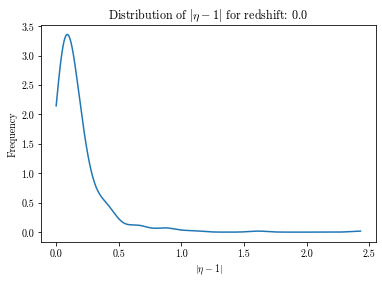

In [4]:
# Make axes.
fig, ax = plt.subplots()
# Set axes settings.
ax.set(title='Distribution of $|\eta-1|$ for redshift: 0.0',
       xlabel='$|\eta-1|$',
       ylabel='Frequency')

# Get distribution of |eta-1|.
abs_eta_kde, abs_eta_x = get_distribution(abs_eta)
# Plot distribution on axes.
line = ax.plot(abs_eta_x, abs_eta_kde(abs_eta_x))

# Save figure to plots folder.
fig.savefig('plots/eta_distribution.eps')

## Combining parameters into $\theta$

$\theta$ is defined as: $\theta = \frac{\Delta + mf_m}{2}$. We use this to combine parameters into theta. We use the average gradient of the line of best fit between $\Delta$ and $f_m$ for a variety of redshifts.

Average gradient: 0.2827188878367328 +- 0.028098880158488156


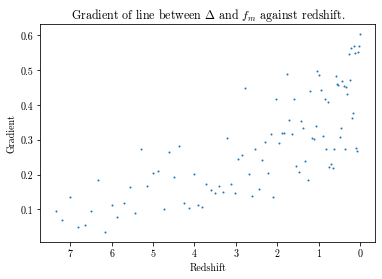

In [5]:
# Store gradients.
grads = []

# Iterate over all redshifts.
for rshift in rshifts:
    # Define new params.
    _, delta, fm = pull_rshift_set(cluster_data, rshift)
    if delta.size != 0:
        # Get gradient of best fit line between them.
        _, popt, pcov,_ = fit_data(fm, delta)
        m, m_err = popt[0], np.sqrt(pcov[0][0])
        # Append gradient and uncertainty to list.
        grads.append([m, m_err, rshift])

# Turn grads into ndarray
grads = np.array(grads)
mean_m, mean_m_err = np.mean(grads[:,0]), np.mean(grads[:,1])
print('Average gradient: {} +- {}'.format(mean_m, mean_m_err))

fig, ax = plt.subplots()
ax.plot(grads[:,2], grads[:,0], 'o', markersize=1)
ax.set(title='Gradient of line between $\\Delta$ and $f_m$ against redshift.',
       xlabel='Redshift',
       ylabel='Gradient',
       xlim=ax.get_xlim()[::-1])
fig.savefig('plots/delta_fm_grad_vs_rshift.eps')

### Gradient of Values at Redshift: 0.0

The gradient of the line of best fit between $\Delta$ and $f_m$ at redshift 0.0 is calculated.

In [6]:
# Set redshift and get params.
_, delta, fm = pull_rshift_set(cluster_data, 0)

# Get gradient of line between them.
_, popt, pcov,_ = fit_data(fm, delta)
m, m_err = popt[0], np.sqrt(pcov[0][0])

print('Gradient: {} +/- {}'.format(m, m_err))

Gradient: 0.6032231665312404 +/- 0.029659313409396197


We will plot a distribution of $\theta$ values for redshift 0.

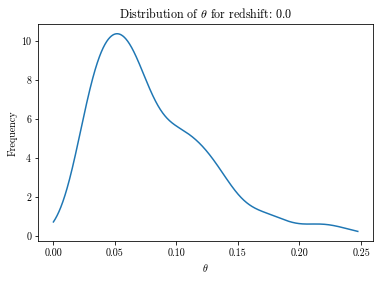

In [7]:
# Determine theta values for this redshift.
theta, theta_err = calc_theta(fm, delta)

# Create axes.
fig, ax = plt.subplots()
# Set axes settings.
ax.set(title='Distribution of $\\theta$ for redshift: 0.0',
       xlabel='$\\theta$',
       ylabel='Frequency')

# Get distribution of theta.
theta_kde, theta_x = get_distribution(theta)
# Plot distribution on figure.
line = ax.plot(theta_x, theta_kde(theta_x))

fig.savefig('plots/{}.eps'.format('theta_distribution'))

## Aligning $\theta$ and $|\eta-1|$

$\theta$ and $|\eta-1|$ should have their peaks aligned in order to reduce the dispersal of parameter $r$.

### $\theta$ and $|\eta-1|$ before alignment

Their distributions are plotted on the same axis and are shown. The red lines indicate the peak values of the distributions.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


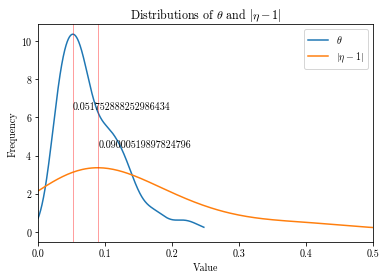

In [8]:
# Set up axes.
fig, ax = plt.subplots()
# Set axes settings.
ax.set(title='Distributions of $\\theta$ and $|\\eta-1|$',
       xlabel='Value',
       ylabel='Frequency',
       xlim=(0,0.5))

# Get theta distribution.
theta_kde, theta_x = get_distribution(theta)
# Plot theta distribution.
theta_line_settings = dict(label='$\\theta$')
theta_line = ax.plot(theta_x, theta_kde(theta_x), **theta_line_settings)

# Get peak value.
theta_peaks, _ = find_peaks(theta_kde(theta_x), prominence=1)
for theta_peak in theta_peaks:
    ax.axvline(theta_x[theta_peak],color='red', alpha=0.5, linewidth=0.75)
    ax.text(theta_x[theta_peak], ax.get_ylim()[1]/2 + 1, str(theta_x[theta_peak]))

# Get |eta-1| distribution.
eta_kde, eta_x = get_distribution(abs_eta)
# Plot |eta-1| distribution.
eta_line_settings = dict(label='$|\\eta-1|$')
eta_line = ax.plot(eta_x, eta_kde(eta_x), **eta_line_settings)

# Get peak value.
eta_peaks, _ = find_peaks(eta_kde(eta_x), prominence=1)
for eta_peak in eta_peaks:
    ax.axvline(eta_x[eta_peak], color='red', alpha=0.5, linewidth=0.75)
    ax.text(eta_x[eta_peak], ax.get_ylim()[1]/2 - 1, str(eta_x[eta_peak]))

# Create legend and save figure.
ax.legend()
fig.savefig('plots/{}.eps'.format('combined_distribution'))

### Aligning the peaks

We now align the peaks of the distribution by applying factors $\alpha$ and $\beta$ to $\theta$ and $|\eta-1|$ respectively.

The peaks should be aligned to be the midpoint of the two previous peak positions $\frac{\theta_{peak}+|\eta-1|_{peak}}{2}$.

$\alpha$ and $\beta$ are therefore defined with the following equations.

$\alpha = \frac{\theta_{peak}+|\eta-1|_{peak}}{2}\frac{1}{\theta_{peak}}$

$\beta = \frac{\theta_{peak}+|\eta-1|_{peak}}{2}\frac{1}{|\eta-1|_{peak}}$


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


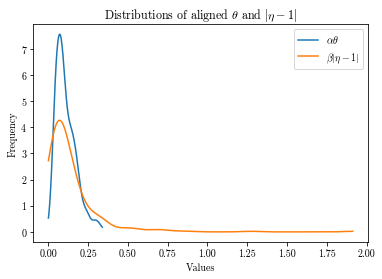

In [9]:
# Set up axes.
fig, ax = plt.subplots()
# Set up axes settings.
ax.set(title='Distributions of aligned $\\theta$ and $|\eta-1|$',
       xlabel='Values',
       ylabel='Frequency')

# Get theta distribution.
theta_kde, theta_x = get_distribution(theta)
# Theta peak position.
theta_peaks, _ = find_peaks(theta_kde(theta_x), prominence=1)
theta_peak = theta_x[theta_peaks[0]]
# Get eta distribution.
eta_kde, eta_x = get_distribution(abs_eta)
# eta peak position.
eta_peaks, _ = find_peaks(eta_kde(eta_x), prominence=1)
eta_peak = eta_x[eta_peaks[0]]

# Get target peak position.
tgt_val = (theta_peak + eta_peak) / 2
# Define alpha.
alpha = tgt_val / theta_peak
# Define beta.
beta = tgt_val / eta_peak

# Weight theta using alpha.
weighted_theta = theta * alpha
# Get new theta distribution.
weighted_theta_kde, weighted_theta_x = get_distribution(weighted_theta)
# Plot weighted theta line.
theta_line_settings = dict(label='$\\alpha\\theta$')
weighted_theta_line = ax.plot(weighted_theta_x, weighted_theta_kde(weighted_theta_x), **theta_line_settings)

# Weight |eta-1| using beta.
weighted_eta = abs_eta * beta
# Get new eta distribution.
weighted_eta_kde, weighted_eta_x = get_distribution(weighted_eta)
# Plot weighted eta line.
eta_line_settings = dict(label='$\\beta|\eta-1|$')
weighted_eta_line = ax.plot(weighted_eta_x, weighted_eta_kde(weighted_eta_x), **eta_line_settings)

# Apply legend.
ax.legend()
# Save figure.
fig.savefig('plots/{}.eps'.format('weighted_combined_distribution'))

## Distribution of $\alpha$ and $\beta$

In order to determine the best $\alpha$ and $\beta$ values to use, we find the values for each redhisft and plot a distribution. This will also help us see whether redhisft affects them.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

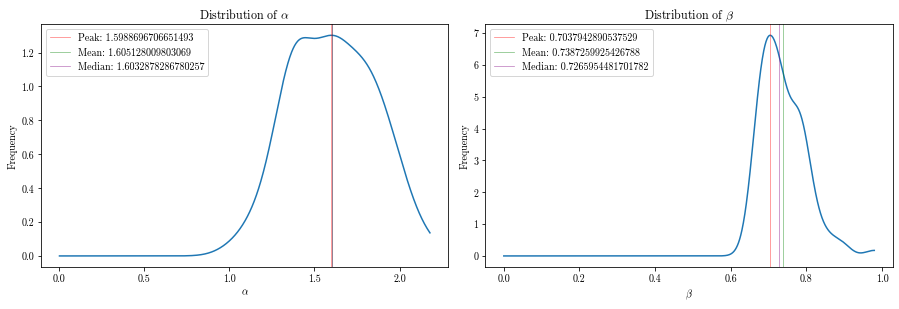

In [10]:
# Store alpha and beta values.
alpha, beta = [], []

# Iterate over redshifts.
for rshift in rshifts:
    # New params for each redshift.
    eta, delta, fm = pull_rshift_set(cluster_data, rshift)
    if eta.size == 0:
        continue
    
    # Calculate theta.
    theta, theta_err = calc_theta(fm, delta)
    # Get distribution of theta.
    theta_kde, theta_x = get_distribution(theta)
    # Theta peak.
    theta_peaks, _ = find_peaks(theta_kde(theta_x), prominence=0.5)
    theta_peak = theta_x[theta_peaks][0]
    
    # Calculate |eta - 1|.
    abs_eta = np.abs(eta - 1)
    # Get distribution of |eta - 1|.
    eta_kde, eta_x = get_distribution(abs_eta)
    # |eta - 1| peak.
    eta_peaks, _ = find_peaks(eta_kde(eta_x))
    eta_peak = eta_x[eta_peaks][0]
    
    # Get target peak position.
    tgt_pos = (theta_peak + eta_peak) / 2.0
    # Store alpha.
    alpha.append(tgt_pos / theta_peak)
    # Store beta.
    beta.append(tgt_pos / eta_peak)

# Turn alpha and beta into ndarrays.
alpha, beta = np.array(alpha), np.array(beta)

# Create axes.
fig, axs = plt.subplots(1,2, figsize=(12.6, 4.4))
# Set axes settings.
axs[0].set(title='Distribution of $\\alpha$',
            xlabel='$\\alpha$',
            ylabel='Frequency')
axs[1].set(title='Distribution of $\\beta$',
            xlabel='$\\beta$',
            ylabel='Frequency')

# Get alpha distribution.
alpha_kde, alpha_x = get_distribution(alpha)
# Plot alpha distribution
alpha_line = axs[0].plot(alpha_x, alpha_kde(alpha_x))

# Get beta distribution.
beta_kde, beta_x = get_distribution(beta)
# Plot beta distribution.
beta_line = axs[1].plot(beta_x, beta_kde(beta_x))

# Get peak alpha values.
alpha_peaks, _ = find_peaks(alpha_kde(alpha_x), prominence=1)
for alpha_peak in alpha_peaks:
    alpha_peak_line = axs[0].axvline(alpha_x[alpha_peak], color='red', alpha=0.5, linewidth=0.75, label='Peak: {}'.format(alpha_x[alpha_peak]))
# Get mean alpha value.
alpha_mean = np.mean(alpha)
alpha_mean_line = axs[0].axvline(alpha_mean, color='green', alpha=0.5, linewidth=0.75, label='Mean: {}'.format(alpha_mean))
# Get median alpha value.
alpha_median = np.median(alpha)
alpha_median_line =axs[0].axvline(alpha_median, color='purple', alpha=0.5, linewidth=0.75, label='Median: {}'.format(alpha_median))

# Get peak beta value.
beta_peaks, _ = find_peaks(beta_kde(beta_x), prominence=1)
for beta_peak in beta_peaks:
    beta_peak_line = axs[1].axvline(beta_x[beta_peak], color='red', alpha=0.5, linewidth=0.75, label='Peak: {}'.format(beta_x[beta_peak]))
# Get mean beta value.
beta_mean = np.mean(beta)
beta_mean_line = axs[1].axvline(beta_mean, color='green', alpha=0.5, linewidth=0.75, label='Mean: {}'.format(beta_mean))
# Get median beta value.
beta_median = np.median(beta)
beta_median_line = axs[1].axvline(beta_median, color='purple', alpha=0.5, linewidth=0.75, label='Median: {}'.format(beta_median))

# Add legend to plots.
for ax in axs:
    ax.legend()

# Save figure.
fig.tight_layout()
fig.savefig('plots/{}.eps'.format('alpha_beta_distribution'))

## Relaxation parameter, $r$

The relaxation parameter can be expressed as:

$r = \alpha\theta + \beta|\eta-1|$

We will plot the distribution of $r$ values at redshift 0.0.

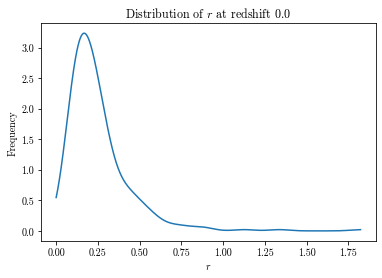

In [11]:
# Select redshift 0
eta, delta, fm = pull_rshift_set(cluster_data, 0)

# Calculate theta.
theta, theta_err = calc_theta(fm, delta)
# Calculate relaxation parameter
r, r_err = calc_r(theta, theta_err, eta)

# Create fig, axes.
fig, ax = plt.subplots()
# Set axes settings.
ax.set(title='Distribution of $r$ at redshift 0.0',
       xlabel='$r$',
       ylabel='Frequency')

# Get distribution of r.
r_kde, r_x = get_distribution(r)
# PLot distribution.
r_line = ax.plot(r_x, r_kde(r_x))

# Save figure.
fig.savefig('plots/{}.eps'.format('r_distribution_r0'))

### $r$ distribution at different redshift

To ensure that there is no systematic change in $r$ at different redshift we plot the distribution of r for each redshift.

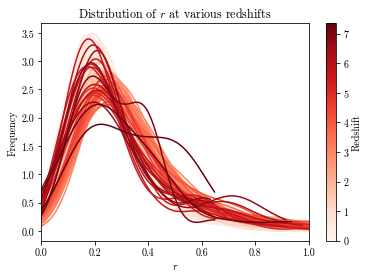

In [12]:
# Set up fig, axes.
fig, ax = plt.subplots()

# Store r_x values.
r_xs = []
# Store r_kde values.
r_kdes = []
# Store redshift values.
zs = []

# Iterate through different redshifts.
for rshift in rshifts:
    # Select params.
    eta, delta, fm = pull_rshift_set(cluster_data, rshift)
    if eta.size == 0:
        continue
    
    # Calculate theta.
    theta, theta_err = calc_theta(fm, delta)
    # Calculate r.
    r, r_err = calc_r(theta, theta_err, eta)
    
    # Get distribution of r.
    r_kde, r_x = get_distribution(r)
    
    # Store r distribution line.
    r_kde, r_x = get_distribution(r)
    r_xs.append(r_x)
    r_kdes.append(r_kde(r_x))
    zs.append(rshift)
    
# Turn stores into numpy arrays.
r_xs = np.array(r_xs)
r_kdes = np.array(r_kdes)
zs = np.array(zs)

# Create line and colormap.
lc = multiline(r_xs, r_kdes, zs, ax=ax, cmap='Reds')
axcb = fig.colorbar(lc)
axcb.set_label('Redshift')

# Set axes settings.
ax.set(title='Distribution of $r$ at various redshifts',
       xlabel='$r$',
       ylabel='Frequency',
       xlim=(0,1))
# Save fig.
fig.savefig('plots/{}.eps'.format('r_distribution_all'))

### Relaxation of a specific cluster

We will now use the new relaxation definition to track the relaxation of a cluster at different redshifts. We will use cluster 1 for this track.

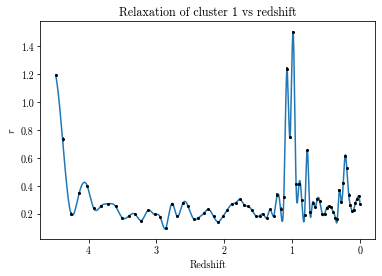

In [13]:
# Select target cluster.
cluster_idx = 1

cluster = cluster_data[cluster_idx]
eta, delta, fm, rshift = cluster[:,0], cluster[:,1], cluster[:,2], cluster[:,3]

# Calculate theta.
theta, theta_err = calc_theta(fm, delta)
# Calculate r.
r, r_err = calc_r(theta, theta_err, eta)

# Create axes.
fig, ax = plt.subplots()

# Plot points.
point_settings = dict(fmt='o', markersize=2, linestyle='None', color='black')
points = ax.errorbar(rshift, r, yerr=r_err, **point_settings)

# Use spline to create a smooth line between data points.
line_settings = dict(markersize=0.75)
xgrid, power_smooth = spline(rshift, r)
line = ax.plot(xgrid, power_smooth, **line_settings)

# Set axes settings.
ax.set(title='Relaxation of cluster {} vs redshift'.format(cluster_idx),
       xlabel='Redshift',
       ylabel='$r$',
       xlim=ax.get_xlim()[::-1])
# Save figure.
fig.savefig('plots/r_vs_redshift_c{}.eps'.format(cluster_idx))

## Just using $\theta$ for different r values

$\theta$ alone might be a good indicator of relaxedness. The value of $\theta$ should be plotted to see how it compares.

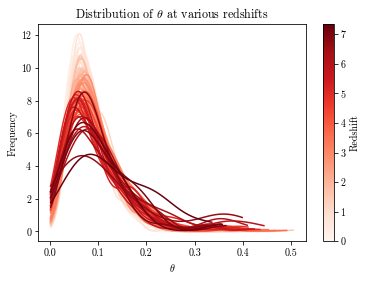

In [14]:
fig, ax = plt.subplots()

# Stores for theta values.
theta_xs = []
theta_kdes = []
zs = []

# Iterate over redshifts.
for rshift in rshifts:
    # Get new parameters for each redshift.
    eta, delta, fm = pull_rshift_set(cluster_data, rshift)
    if eta.size == 0:
        continue
    
    # Calculate theta
    theta, theta_err = calc_theta(fm, delta)
    theta_kde, theta_x = get_distribution(theta)
    
    # Store distribution.
    theta_xs.append(theta_x)
    theta_kdes.append(theta_kde(theta_x))
    zs.append(rshift)

# Convert to numpy arrays.
theta_xs = np.array(theta_xs)
theta_kdes = np.array(theta_kdes)
zs = np.array(zs)

# Create line and colormap.
lc = multiline(theta_xs, theta_kdes, zs, ax=ax, cmap='Reds')
axcb = fig.colorbar(lc)
axcb.set_label('Redshift')
    
ax.set(title='Distribution of $\\theta$ at various redshifts',
       xlabel='$\\theta$',
       ylabel='Frequency')
fig.savefig('plots/theta_dist_all_rshifts.eps')

### $\theta$ for a specific cluster at different redshifts

See how $\theta$ works as an indicator of relaxedness for a specific cluster.

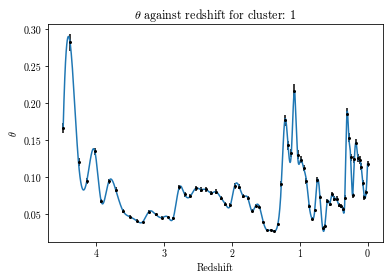

In [15]:
# Set cluster idx.
cluster_idx = 1
# Select cluster.
cluster = cluster_data[cluster_idx]
eta, delta, fm, rshift = cluster[:,0], cluster[:,1], cluster[:,2], cluster[:,3]
# Calculate theta.
theta, theta_err = calc_theta(fm, delta)

# Plot theta against redshift.
fig, ax = plt.subplots()

# Create points.
point_settings = dict(fmt='o', markersize=2, linestyle='None', color='black')
points = ax.errorbar(rshift, theta, yerr=theta_err, **point_settings)

# Use spline to create smooth line between data points.
line_settings = dict(markersize=0.75)
xgrid, power_smooth = spline(rshift, theta)
line = ax.plot(xgrid, power_smooth, **line_settings)

ax.set(title='$\\theta$ against redshift for cluster: {}'.format(cluster_idx),
       xlabel='Redshift',
       ylabel='$\\theta$',
       xlim=ax.get_xlim()[::-1])
fig.savefig('plots/theta_dist_c{}.eps'.format(cluster_idx))

## Compare peaks with plot of central masses.

We can compare the relaxation of the cluster at different redshifts with the mass of the cluster at each point. First we read in the text file containing the mass data.

In [16]:
# Get mass data from file.
mass_data = read_mass_data('G3X-Central-Masses-for-M200.txt')

### Plot mass data.

Next, we can plot the mass for a specific cluster against redshift values.

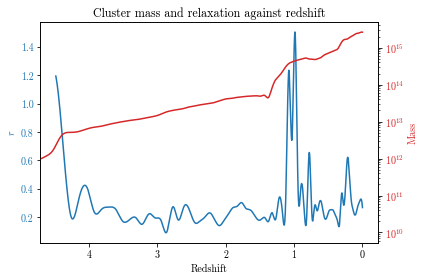

In [17]:
# Set cluster idx.
cluster_idx = 1
# Select cluster mass history.
cluster_mass = mass_data[cluster_idx]

# Get cluster parameters.
cluster = cluster_data[cluster_idx]
eta, delta, fm, rshift = cluster[:,0], cluster[:,1], cluster[:,2], cluster[:,3]
# Calculate theta.
theta, theta_err = calc_theta(fm, delta)
# Calculate r.
r, r_err = calc_r(theta, theta_err, eta)
    
# Plot mass of specific cluster against redshift.
fig, ax1 = plt.subplots()

# Use spline to make a curved line of r against rshift.
color = 'tab:blue'
r_line_settings = dict(markersize=0.75, color=color, label='Cluster relaxation')
xgrid, power_smooth = spline(rshift, r)
r_line = ax1.plot(xgrid, power_smooth, **r_line_settings)
# Set axis settings.
ax1.set(title='Cluster mass and relaxation against redshift',
        xlabel='Redshift',
        xlim = ax1.get_xlim()[::-1]
       )
ax1.set_ylabel('$r$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create second axis that shares the same x axis.
ax2 = ax1.twinx()

# Use spline to make a curved line of mass points against rshift.
color = 'tab:red'
mass_line_settings = dict(markersize=0.75,color=color, label='Cluster mass')
idx = np.where(cluster_mass > 0)[0]
xgrid, power_smooth = spline(rshifts[idx], cluster_mass[idx])
mass_line = ax2.plot(xgrid, power_smooth, **mass_line_settings)
# Set axis settings.
ax2.set_ylabel('Mass', color=color)
ax2.set_yscale('log')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
fig.savefig('plots/mass_r_vs_rshift_c{}.eps'.format(cluster_idx))

### Plot against mass change/mass

We will try to see how the relaxation compares with the host halo mass and infalling mass. To do this we find the mass change divided by the total mass at that point.

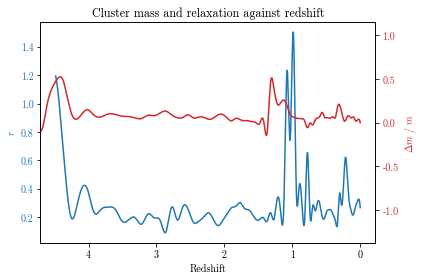

In [18]:
# Set cluster idx.
cluster_idx = 1
# Get cluster mass history.
cluster_mass = mass_data[cluster_idx]
# Ignore masses once they are 0.
idx = np.where(cluster_mass > 0)[0]
cluster_mass = cluster_mass[idx]

# Iterate over masses to determine mass change.
mass_changes = []
for i in range(0, cluster_mass.size):
    try:
        mass_change = cluster_mass[i] - cluster_mass[i+1]
    except:
        mass_change = cluster_mass[i]
    mass_changes.append(mass_change)
mass_changes = np.array(mass_changes)
    
# Get cluster parameters.
cluster = cluster_data[cluster_idx]
eta, delta, fm, rshift = cluster[:,0], cluster[:,1], cluster[:,2], cluster[:,3]
# Calculate theta.
theta, theta_err = calc_theta(fm, delta)
# Calculate r.
r, r_err = calc_r(theta, theta_err, eta)

# Plot mass of specific cluster against redshift.
fig, ax1 = plt.subplots()

# Use spline to make a curved line of r against rshift.
color = 'tab:blue'
r_line_settings = dict(markersize=0.75, color=color, label='Cluster relaxation')
xgrid, power_smooth = spline(rshift, r)
r_line = ax1.plot(xgrid, power_smooth, **r_line_settings)
# Set axis settings.
ax1.set(title='Cluster mass and relaxation against redshift',
        xlabel='Redshift',
        xlim = ax1.get_xlim()[::-1]
       )
ax1.set_ylabel('$r$', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create second axis that shares the same x axis.
ax2 = ax1.twinx()

# Use spline to make a curved line of mass points against rshift.
color = 'tab:red'
mass_line_settings = dict(markersize=0.75,color=color, label='Cluster mass')
idx = np.where(cluster_mass > 0)[0]
xgrid, power_smooth = spline(rshifts[idx], mass_changes / cluster_mass)
mass_line = ax2.plot(xgrid, power_smooth, **mass_line_settings)
# Set axis settings.
ax2.set_ylabel('$\\Delta m$ / $m$', color=color)
# ax2.set_yscale('log')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
fig.savefig('plots/mass_change_r_vs_rshift_c{}.eps'.format(cluster_idx))

## Defining relaxation

We use the peak position of the relaxation parameter distribution as the relaxation threshold. We will use the relaxation parameter defined as:

$r=\alpha\theta+\beta|\eta-1|$

Only the data at redshift: 0.0 is appropriate for defining the relaxation threshold. The distribution along with the peak is plotted.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


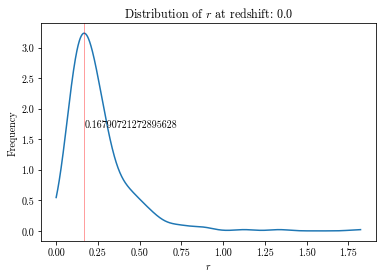

In [19]:
# Select only redshift 0.0 data.
eta, delta, fm = pull_rshift_set(cluster_data, 0)

# Calculate theta.
theta, theta_err = calc_theta(fm, delta)
# Calculate r.
r, r_err = calc_r(theta, theta_err, eta)

# Create figure and axes for plotting.
fig, ax = plt.subplots()
# Set axes settings.
ax.set(title='Distribution of $r$ at redshift: 0.0',
       xlabel='$r$',
       ylabel='Frequency')

# Get distribution of r.
r_kde, r_x = get_distribution(r)
# Plot on axes.
r_dist_line = plt.plot(r_x, r_kde(r_x))

# Get peak value.
r_peaks, _ = find_peaks(r_kde(r_x), prominence=1)
for r_peak in r_peaks:
    ax.axvline(r_x[r_peak], color='red', alpha=0.5, linewidth=0.75)
    ax.text(r_x[r_peak], ax.get_ylim()[1]/2, str(r_x[r_peak]))
    
# Save figure.
fig.savefig('plots/r_dist_peak_r0.eps')

### Alternate thresholds

Using the thresholds in Cui et al. 2017 defined as:

$T_r = \alpha T_{\theta}+0.15\beta$

where: $T_{\theta}=\frac{0.04+0.1m}{2}$

We can calculate the threshold value and compare with our other threshold value.

In [20]:
# Define alpha and beta
alpha, beta = 1.5988696706651493, 0.7037942890537529
# Define theta threshold.
theta_threshold = (0.04 + 0.1 * 0.6032231653176229) / 2.0

# Calculate r threshold.
threshold_r = alpha * theta_threshold + 0.15 * beta
print('r threshold: {}'.format(threshold_r))

r threshold: 0.18577029795481476


### Track relaxation of a cluster with thresholds shown

The relaxation of a cluster is shown with the threhold values.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


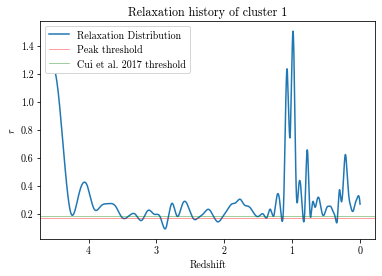

In [21]:
# Target cluster.
cluster_idx = 1
# Store relaxation values.
r_cols = []
# Peak threshold value.
peak_threshold = 0.16790721272895628
# 2017 threshold value.
cui_threshold = 0.18577029795481476

cluster = cluster_data[cluster_idx]
eta, delta, fm, rshift = cluster[:,0], cluster[:,1], cluster[:,2], cluster[:,3]

# Calculate theta.
theta, theta_err = calc_theta(fm, delta)
# Calculate r.
r, r_err = calc_r(theta, theta_err, eta)

# Get figure and axes for plotting.
fig, ax = plt.subplots()

# Plot smooth distribution of r vals.
xgrid, power_smooth = spline(rshift, r)
r_line = ax.plot(xgrid, power_smooth, label='Relaxation Distribution')

# Add peak threshold line.
ax.axhline(peak_threshold, color='red', alpha=0.5, linewidth=0.75, label='Peak threshold')
# Add Cui threshold line.
ax.axhline(cui_threshold, color='green', alpha=0.5, linewidth=0.75, label='Cui et al. 2017 threshold')

# Set axis settings.
ax.set(title='Relaxation history of cluster {}'.format(cluster_idx),
       xlabel='Redshift',
       xlim=ax.get_xlim()[::-1],
       ylabel='$r$')
# Add legend
ax.legend()

# Save figure
fig.savefig('plots/relaxation_c{}_thresholds.eps'.format(cluster_idx))


## Relaxation timescale

First we identify the peaks of the relaxation distribution. For each peak, we check to see whether it is above the peak threshold value.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


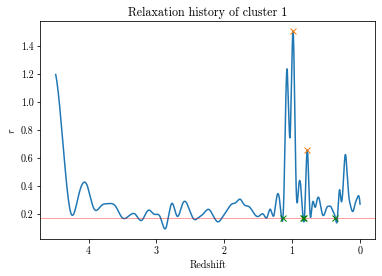

In [22]:
# Target cluster.
cluster_idx = 1
# Peak threshold value.
peak_threshold = 0.16790721272895628

# Track relaxation of cluster.
r, r_err, rshift = track_relaxation(cluster_data, cluster_idx)

# Get figure and axes for plotting.
fig, ax = plt.subplots()

# Plot smooth distribution of r vals.
xgrid, power_smooth = spline(rshift, r)
r_line = ax.plot(xgrid, power_smooth)

# Add peak threshold line.
ax.axhline(peak_threshold, color='red', alpha=0.5, linewidth=0.75)

# Identify relaxation peaks.
peaks, _= find_peaks(power_smooth, prominence=0.5)
ax.plot(xgrid[peaks], power_smooth[peaks], 'x')

# Iterate over peaks to detect where they dip below the threshold.
for peak in peaks:
    # Only use peaks above the threshold.
    if power_smooth[peak] >= peak_threshold:
        # Add a counter for iterating either side of peak.
        counter = 0
        left_dip, right_dip = False, False
        
        while left_dip == False or right_dip == False:
            try:
                if power_smooth[peak + counter] <= peak_threshold and right_dip == False:
                    right_dip = peak + counter
            except:
                right_dip = 'NO LIMIT'
            try:
                if power_smooth[peak - counter] <= peak_threshold and left_dip == False:
                    left_dip = peak - counter
            except:
                left_dip = 'NO LIMIT'
            counter += 1
        
        if left_dip != 'NO LIMIT':
            ax.plot(xgrid[left_dip], power_smooth[left_dip], 'x', color='green')
        if right_dip != 'NO LIMIT':
            ax.plot(xgrid[right_dip], power_smooth[right_dip], 'x', color='green')
            
        timescale = None
        if left_dip != 'NO LIMIT' and right_dip != 'NO LIMIT':
            timescale = xgrid[right_dip] - xgrid[left_dip]
        
# Set axis settings.
ax.set(title='Relaxation history of cluster {}'.format(cluster_idx),
       xlabel='Redshift',
       xlim=ax.get_xlim()[::-1],
       ylabel='$r$')

# Save figure
fig.savefig('plots/relaxation_peaks_c{}.eps'.format(cluster_idx))


### Distribution of multiple clusters

We now iterate through the relaxation history of every cluster and as above, find the peaks and relaxation timescales. We then plot a distribution of these values.

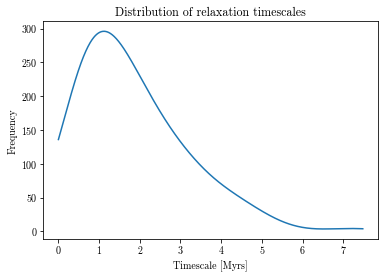

In [23]:
# Iterate over every cluster.
timescales = []
for cluster_idx in cluster_data.keys():
    # Track relaxation of cluster.
    r, r_err, rshift = track_relaxation(cluster_data, cluster_idx)
    
    dips = peak_limits(rshift, r, peak_threshold)
    for pair in dips:
        # COnvert from redshift to lookback time.
        timescales.append(lookback_time(rshift[pair[1]]) - lookback_time(rshift[pair[0]]))
        
timescale_kde, timescale_x = get_distribution(timescales)
# PLot on axis.
fig, ax = plt.subplots()
ax.plot(timescale_x*1e3, timescale_kde(timescale_x))
ax.set(title='Distribution of relaxation timescales',
       xlabel='Timescale [Myrs]',
       ylabel='Frequency')
fig.savefig('plots/timescale_distribution.eps')